---

#<h2 style="text-align: center;"><b>НС из одного нейрона</b></h3>

---

##<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **эпох** обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

##<h3 style="text-align: center;"><b>Один нейрон на Keras</b></h3>

Данные пока что возьмём как и прежде -- "яблоки и груши":

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("apples_pears.csv")

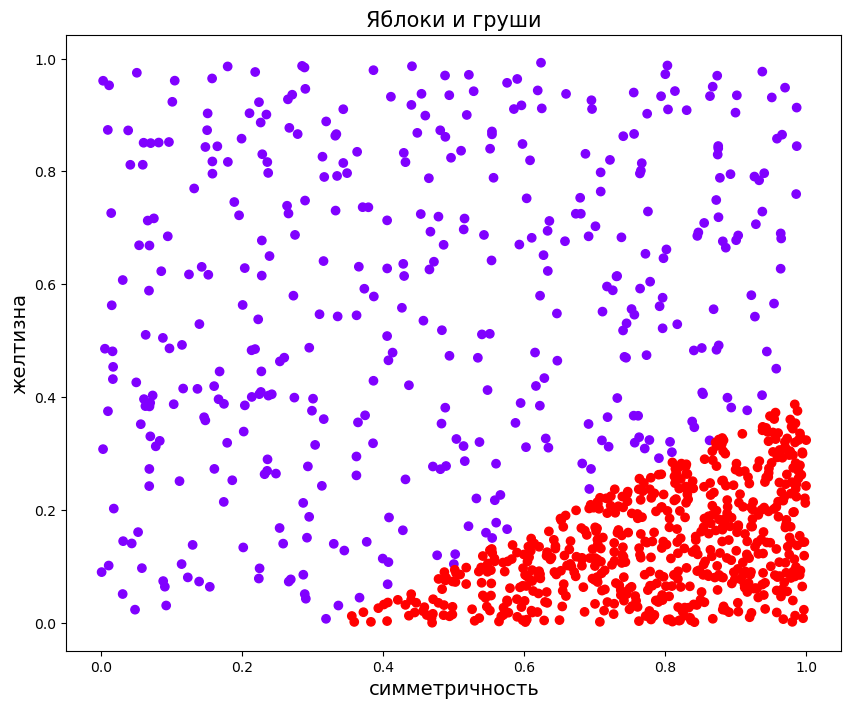

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [4]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [6]:
X[:,:10]

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]])

In [7]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))



In [8]:
neuron

Пока что мы просто создали объект класса `Sequential`, который состоит из одного линейного слоя размерности (num_features, 1) и последующего применения сигмоиды. Но уже сейчас его можно применить к объекту (тензору), просто веса в начале инициализирутся случайно и при forward_pass'е мы получим какой-то ответ пока что необученного нейрона:

In [9]:
neuron.predict([[1,1]])

array([[0.39249486]], dtype=float32)

Предскажем ещё необученным нейроном:

[[False]
 [ True]
 [False]
 [False]
 [False]]


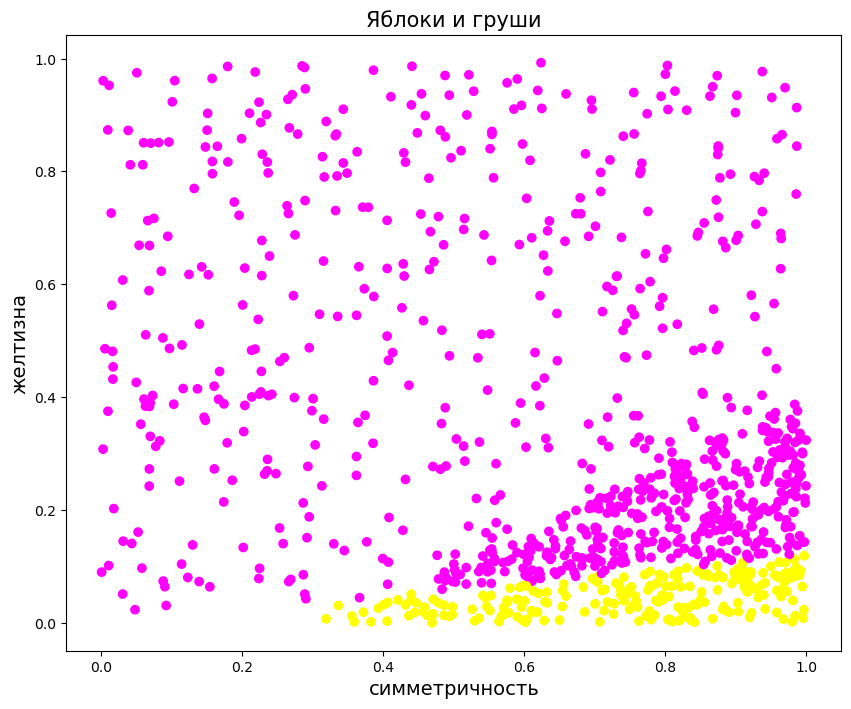

In [10]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
print(y_pred[:5])
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Как и ожидалось, ничего полезного. Давайте научим нейрон отличать груши от яблок по их симметричности и желтизне!

## Код обучения одного нейрона на Keras:

In [11]:
import tensorflow as tf
from tensorflow.keras import optimizers
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.2211 - accuracy: 0.8413 - val_loss: 0.2100 - val_accuracy: 0.8850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.8363 - val_loss: 0.1959 - val_accuracy: 0.8000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.7862 - val_loss: 0.1862 - val_accuracy: 0.7750
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.7887 - val_loss: 0.1778 - val_accuracy: 0.8050
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.8012 - val_loss: 0.1702 - val_accuracy: 0.8300
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.8213 - val_loss: 0.1633 - val_accuracy: 0.8450
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.8313 - val_loss: 0.1569 - val_accuracy: 0.8550
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.9300 - val_loss: 0.0677 - val_accuracy: 0.9500
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9300 - val_loss: 0.0672 - val_accuracy: 0.9500
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9300 - val_loss: 0.0667 - val_accuracy: 0.9500
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9300 - val_loss: 0.0662 - val_accuracy: 0.9500
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9312 - val_loss: 0.0658 - val_accuracy: 0.9500
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9312 - val_loss: 0.0654 - val_accuracy: 0.9500
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9312 - val_loss: 0.0649 - val_accuracy: 0.9500
Epoch 

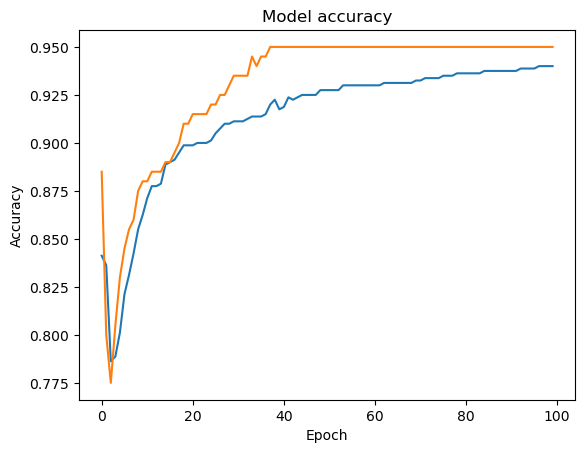

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()




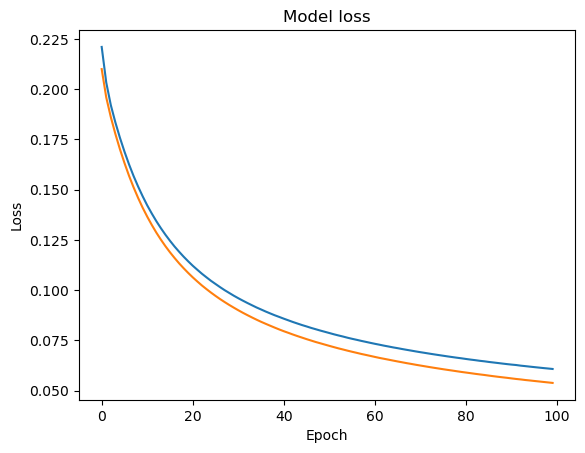

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Обучили. Предскажем теперь:

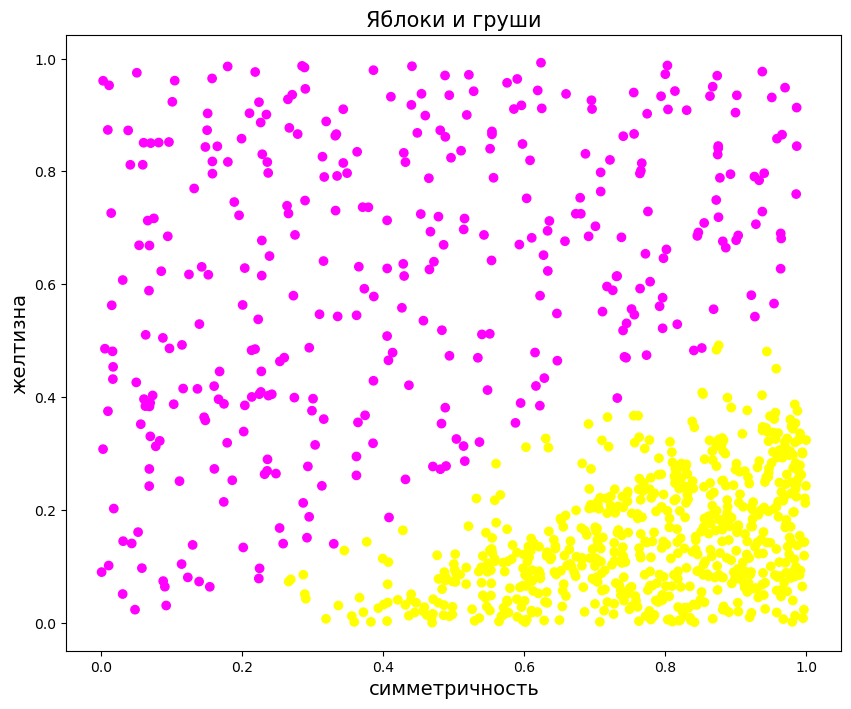

In [14]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Можно добиться лучшего качества работы путём изменения `learning_rate` и количества эпох (возможно, ещё функции потерь и функции активации). 
# Задание 1
Проанализировать влияние следующих параметров на качество обучения модели: скорость обучения, количество эпох, виды оптимизаторов.
Результаты анализа представить в виде графиков (диаграмм)   

---

Нейрон работет, отличает яблоки от груш. Давайте попробуем более сложную выборку, которая уже не разделяется линейно:

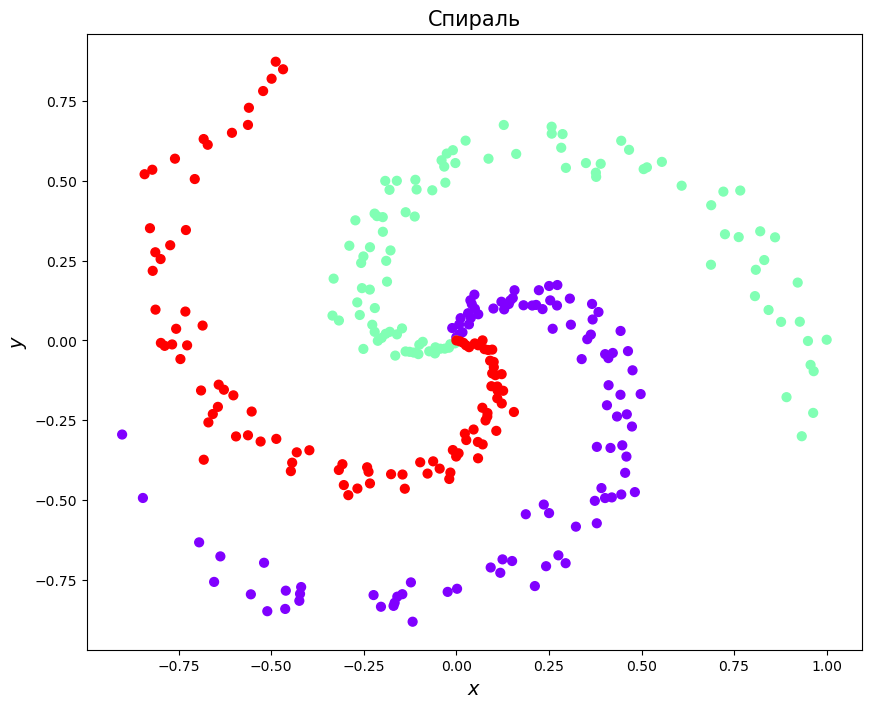

In [15]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Данные в Variable():

In [16]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


Попробуем нейрон с сигмоидой на линейно неразделимой выборке:

In [17]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.0001)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 1s 100ms/step - loss: 0.6456 - accuracy: 0.3042 - val_loss: 2.1094 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.6456 - accuracy: 0.3042 - val_loss: 2.1093 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6455 - accuracy: 0.3042 - val_loss: 2.1090 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6455 - accuracy: 0.3042 - val_loss: 2.1088 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6454 - accuracy: 0.3042 - val_loss: 2.1085 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6453 - accuracy: 0.3042 - val_loss: 2.1082 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6453 - accuracy: 0.3042 - val_loss: 2.1079 - val_accuracy: 0.

4/4 [==============================] - 0s 11ms/step - loss: 0.6377 - accuracy: 0.2958 - val_loss: 2.0751 - val_accuracy: 0.0000e+00
Epoch 114/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6377 - accuracy: 0.2958 - val_loss: 2.0747 - val_accuracy: 0.0000e+00
Epoch 115/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6376 - accuracy: 0.2958 - val_loss: 2.0744 - val_accuracy: 0.0000e+00
Epoch 116/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6375 - accuracy: 0.2958 - val_loss: 2.0741 - val_accuracy: 0.0000e+00
Epoch 117/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6374 - accuracy: 0.2958 - val_loss: 2.0738 - val_accuracy: 0.0000e+00
Epoch 118/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6374 - accuracy: 0.2958 - val_loss: 2.0735 - val_accuracy: 0.0000e+00
Epoch 119/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6373 - accuracy: 0.2958 - val_loss: 2.0732 - val_accuracy: 0.0

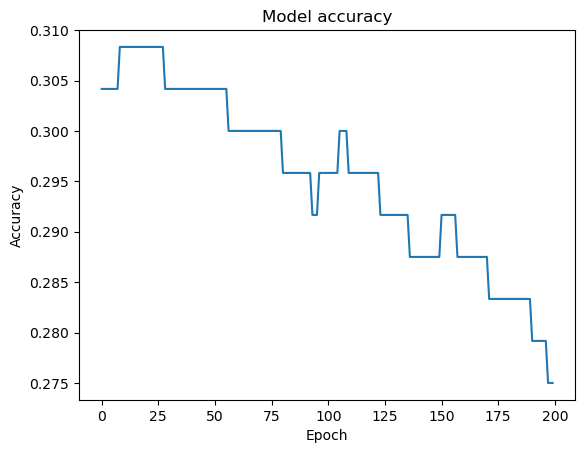

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Не слишком впечатляет. 

# Задание 2
Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов.
Результаты анализа представить в виде графиков (диаграмм)   

Большего улучшения добиться не получиться. Поэтому попробуем применить многослойную нейросеть в следующем ноутбуке.